## 

# UE 4268 - QISKIT LAB 4 - Evalution formative


**`ATAFOUNDJO TIWA BRINDA SORELLE`**, `19E2437` et `sorelle.atafoundjo@facsciences-uy1.cm` 


Department of Physics - Faculty of Science - University of Yaoundé I

`Nom du Laboratoire: PMB`

`Date: 01 Mai 2023`

 **Duree: 120 min**

$$
\newcommand{\br}{\mathbf{r}}  
\newcommand{\ad}{a^\dagger}  
$$

## 1 - Atome d'Helium



Considérons l’exemple d’un système de deux électrons situés dans le champ coulombien d’un
noyau $Ze_{0}$. C’est le cas de l’atome d’hélium.


 **1. Rappeler l’expression générale du Hamiltonien de cet atome.**


\begin{equation*}
\mathtt{H}=\mathtt{T}_e+\mathtt{T}_n+\mathtt{U}_{en}+\mathtt{U}_{en}+\mathtt{U}_{nn},
\end{equation*}


**2. Espace symétrique et antisymétrique des orbitales de type STO.**

 
   _Soit $\phi_{1S}(r)= 2\alpha^{3/2}e^{-\alpha r}$ la fonction d'etat d'un electron a la position r._

 (a) Ecrire les fonctions d'etat de type Slater symétriques et antisymétriques normalisées de He.

Labellisons chaque orbitale ainsi qu'il suit :
\begin{align*}
 &|A_\uparrow\rangle=|00\rangle=|\mathbf{0}\rangle,  &&|A_\downarrow\rangle=|01\rangle=|\mathbf{1}\rangle,
&&|B_\uparrow\rangle=|10\rangle=|\mathbf{2}\rangle,  &|B_\downarrow\rangle=|11\rangle=|\mathbf{3}\rangle.
\end{align*}
L'état de Hartree-Fock possède les deux électrons dans les orbitales $|A\rangle$. Un état HF incorrectement symétrisé serait donc $|A_\uparrow\rangle_1
|A_\downarrow\rangle_2 = |\mathbf{0}\rangle_1|\mathbf{1}\rangle_2$, où les indices indiquent l'électron décrit par chaque orbitale. La fonction d'état HF correctement antisymétrisée serait 
\begin{equation*}
\begin{split}
    |\Psi_{\mathrm{HF}}\rangle =  \frac{1}{\sqrt{2}}
		\begin{vmatrix}
		A_\uparrow(\mathbf{x}_0) & A_\downarrow(\mathbf{x}_0)\\
		A_\uparrow(\mathbf{x}_1) & A_\downarrow(\mathbf{x}_1)\\
		\end{vmatrix}
		&= \frac{1}{\sqrt{2}}  \Big( A_\uparrow(\mathbf{x_0}) A_\downarrow(\mathbf{x_1}) - A_\downarrow(\mathbf{x_0}) A_\uparrow(\mathbf{x_1})  \Big)\\
&=\frac{1}{\sqrt{2}} (|\mathbf{0}\rangle_1|\mathbf{1}\rangle_2 - |\mathbf{1}\rangle_1|\mathbf{0}\rangle_2 ).
\end{split}
\end{equation*}

 (b) Ecrire un code python permettant de visualiser ces fonctions.


In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:

x = np.linspace(-5,5,num=1000)
r = abs(x)
alpha = 1.0

R = 2*alpha**(1.5)*np.exp(-alpha*r)

plt.figure(figsize=(4,3))
plt.plot(x,R,label="STO 1s He")
plt.legend()

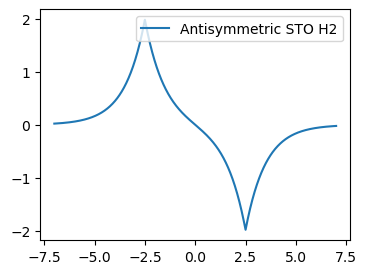

In [13]:
x = np.linspace(-7,7,num=1000)
r1 = abs(x+2.5)
r2 = abs(x-2.5)
alpha = 1.0

R = 2*alpha**(1.5)*np.exp(-alpha*r1)-2*alpha**(1.5)*np.exp(-alpha*r2)

plt.figure(figsize=(4,3))
plt.plot(x,R,label="Antisymmetric STO H2")
plt.legend()

### **3. Espace symétrique et antisymétrique des orbitales de type GTO**

  _Soit $\phi_{1S}(r)= (\frac{2\alpha}{\pi})^{\frac{3}{4}}e^{-\alpha r^2}$ la fonction d'etat d'un electron a la position r._

 (a) Ecrire les fonctions d'etat de type Gaussienne symétriques et antisymétriques normalisées de He.



Ce sont les fonctions d'état radiales de la forme

 \begin{equation*}
 R_\ell(r) = B(\ell,\alpha) r^\ell e^{-\alpha r^2},
\end{equation*}

où,
 * $\ell\leq n$ est le nombre quantique de moment quantique orbital et $n$ le nombre quantique principal;
 * $r$ est la distance entre l'électron et le noyau atomique;
 * $\alpha$ est l'exposant orbital qui contrôle la vitesse à laquelle la densité de l'orbite s'annule en fonction de la distance nucléaire $r$;
 * $B(\ell,\alpha)$ est le facteur de normalisation.


(b) Ecrire un code python permettant de visualiser ces fonctions.


In [15]:
x = np.linspace(-7,7,num=1000)
r = abs(x)
c = [0.444635,0.535328,0.154329]
alpha = [0.109818,0.405771,2.227660]

psi = 0
for k in range(3):
    psi += c[k]*(2*alpha[k]/np.pi)**0.75 * np.exp(-alpha[k]*r**2)

plt.figure(figsize=(5,3))
plt.plot(x,psi,label="STO-3G 1s He")
plt.legend()


In [16]:
x = np.linspace(-7,7,num=1000)
r1 = abs(x+2.5)
r2 = abs(x-2.5)
c = [0.444635,0.535328,0.154329]
alpha = [0.109818,0.405771,2.227660]

psi = 0
for k in range(3):
    psi += c[k]*(2*alpha[k]/np.pi)**0.75 * np.exp(-
alpha[k]*r1**2) \
- c[k]*(2*alpha[k]/np.pi)**0.75 * np.exp(-alpha[k]*r2**2)

plt.figure(figsize=(5,3))
plt.plot(x,psi,label="Antisymmetric STO-3G H2")
plt.legend()

### 2 - Relations d'anti-commutation

In [17]:
from qiskit_nature.second_q.operators import FermionicOp
from qiskit_nature.second_q.operators.commutators import anti_commutator

   Verifier les egalités suivantes :
   
   * $\{a_1, \ad_1\}= 1$
   
   * $\{\ad_2, \ad_3\}= 0$
   
   * $\{\ad_2, \ad_3\}= 0$
   * $\ad_0a_1\ad_1a_2 = \ad_0a_2 - \ad_0\ad_1a_1\ad_2$
   
   * $\ad_0a_4+\ad_0a_2=0$

 * $\{a_1, \ad_1\}= 1$

In [30]:
op = FermionicOp(
    {
        "+_1 -_1": 1,
        "-_1 +_1": 1,
    },
    num_spin_orbitals=2,
)
op.normal_order()

FermionicOp({'': 1.0}, num_spin_orbitals=2, )

   * $\{\ad_2, \ad_3\}= 0$

In [29]:
op1 = FermionicOp({"+_0 -_1": 1}, num_spin_orbitals=2)
op2 = FermionicOp({"-_1 +_2": 1}, num_spin_orbitals=3)

a12 = anti_commutator(op1,op2)
a12.normal_order()

FermionicOp({}, num_spin_orbitals=3, )

* $\{\ad_2, \ad_3\}= 0$

In [24]:
op1 = FermionicOp({"+_0 -_1": 1}, num_spin_orbitals=2)
op2 = FermionicOp({"-_1 +_2": 1}, num_spin_orbitals=3)

a12 = anti_commutator(op1,op2)
a12.normal_order()

FermionicOp({}, num_spin_orbitals=3, )

* $\ad_0a_1\ad_1a_2 = \ad_0a_2 - \ad_0\ad_1a_1\ad_2$

In [28]:
opx = FermionicOp({"+_0 -_1 +_1 -_2" : 1}, num_spin_orbitals=4)
op = FermionicOp(
    {
        "+_0 -_2": 1.0,
        "+_0 +_1 -_1 -_2": -1.0,
    },
    num_spin_orbitals=4,
)
opx.normal_order().equiv(op.normal_order())

True

## 3 - Problème de structure électronique : Cas de la molécule d’eau (H2O)



  On donne les coordonnées xyz de la molécule
  
  **H : 0.968877 0.012358 0.000000**
  
  **O : -0.019830 -0.025588 0.000000**
  
  **H : -0.229801 0.941311 0.000000**



In [19]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver


  * Reprendre les étapes du problème électronique du cas de la molécule d’hydrogène pour
traiter le cas de la molécule d’eau.


In [20]:
#reponse

* Imprimer les 6 premiers termes de l'opérateur fermionique de la molécule $H_2O$:

In [21]:
#reponse

* Utiliser la méthode `FermionicOp.to_matrix` pour obtenir une représentation matricielle de la molécule d'eau dans la base de Fock.

In [22]:
#reponse


Lien utile : https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/chemistry/QubitMappings.ipynb?short_path=70b1d78

In [ ]:
import qiskit.tools.jupyter

%qiskit_version_table